## Machine Learning Models:

   Unnamed: 0  Time Serie AUSTRALIA - AUSTRALIAN DOLLAR/US$ BRAZIL - REAL/US$  \
0           0  2006-01-02                                ND                ND   
1           1  2006-01-03                            1.3552            2.3362   
2           2  2006-01-04                            1.3396             2.302   
3           3  2006-01-05                            1.3365             2.281   
4           4  2006-01-06                            1.3284            2.2875   

  CANADA - CANADIAN DOLLAR/US$ CHINA - RENMINBI/US$  \
0                           ND                   ND   
1                       1.1571                8.069   
2                       1.1515               8.0702   
3                       1.1619               8.0678   
4                        1.165               8.0663   

  DENMARK - DANISH KRONE/US$ EURO AREA - EURO/US$  \
0                         ND                   ND   
1                      6.231               0.8348   
2                     6

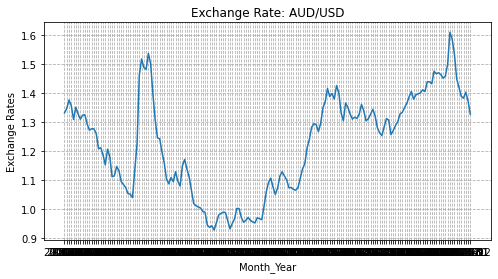

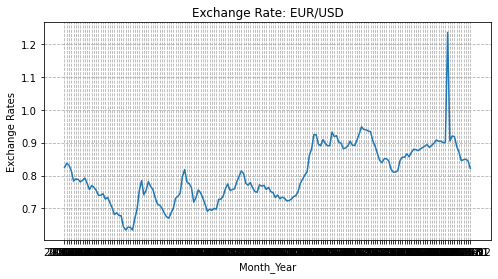

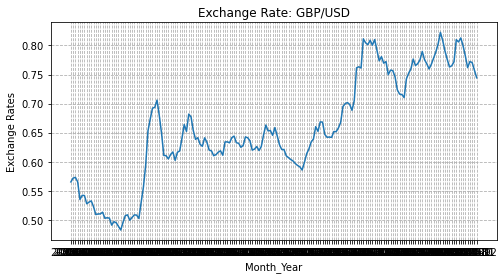

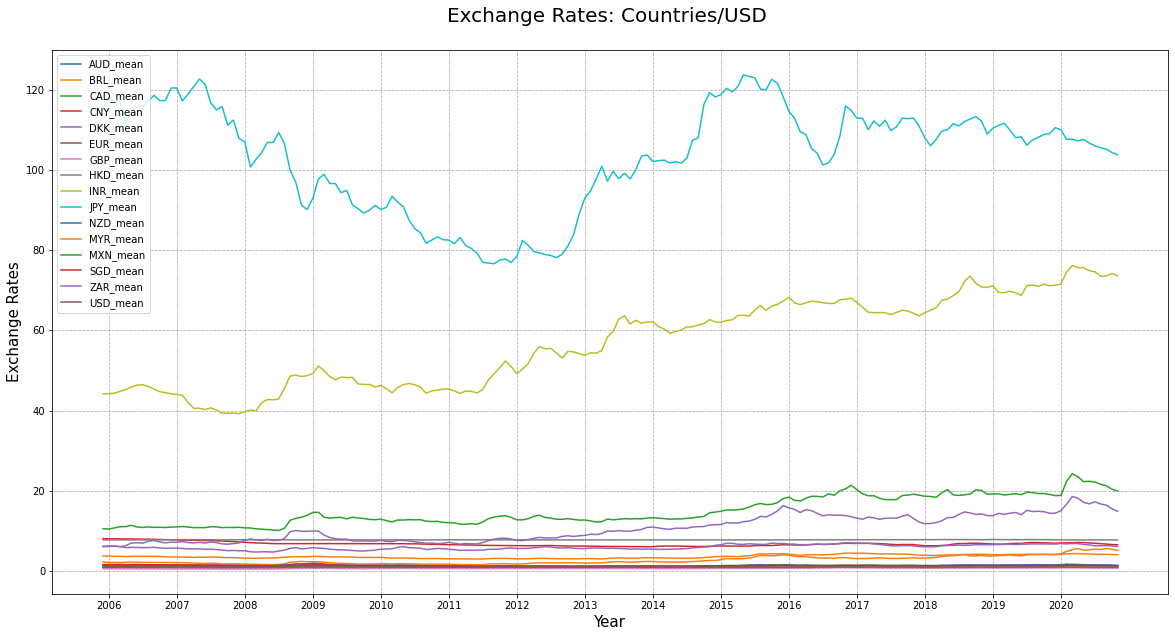

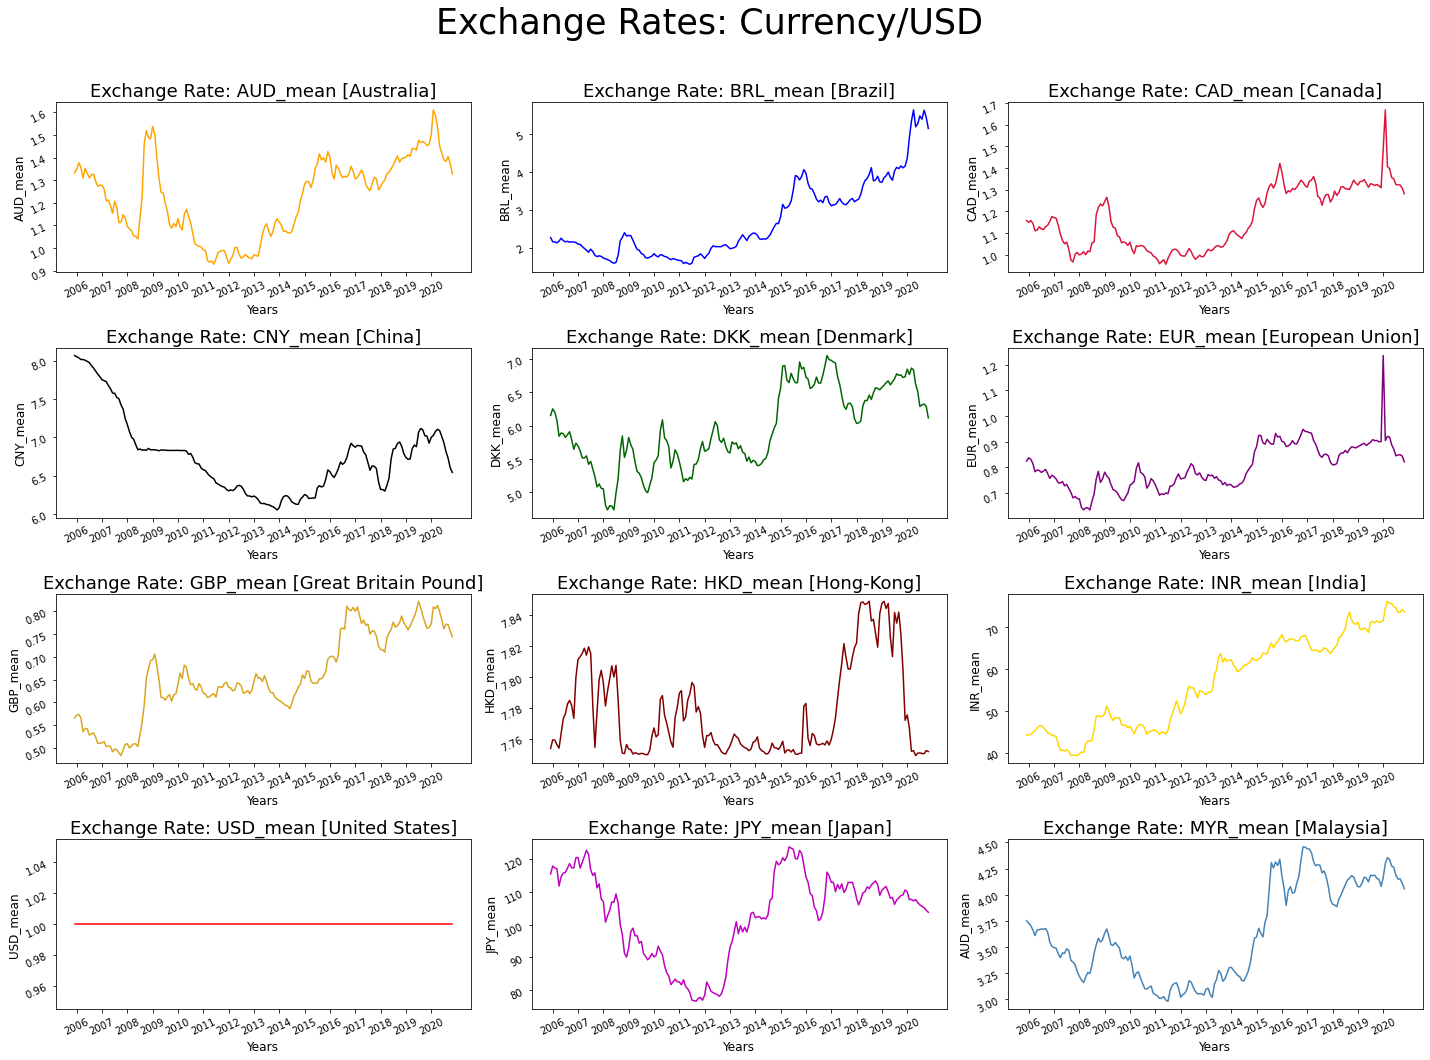

In [1]:
%run Explanatory-Data-Analysis-and-Data-Visualization.ipynb

### Linear Regression

In [2]:
# Importing the Interest Rate Differential
ir_df = pd.read_csv('IR_AUDUSD.csv')
ir_df.head()

Date Long Carry Short Carry
0  1/1/2016      1.05%      -2.99%
1  2/1/2016      1.09%      -3.01%
2  3/1/2016      1.01%      -3.08%
3  4/1/2016      1.26%      -3.02%
4  5/1/2016      1.32%      -3.07%

In [3]:
# converting the date to 'YYYY-MM-DD' format
ir_df['Date'] = pd.to_datetime(ir_df['Date'])
ir_df.head()

Date Long Carry Short Carry
0 2016-01-01      1.05%      -2.99%
1 2016-02-01      1.09%      -3.01%
2 2016-03-01      1.01%      -3.08%
3 2016-04-01      1.26%      -3.02%
4 2016-05-01      1.32%      -3.07%

In [4]:
# using Long Carry to tranasform the data for the analysis
# removing the percentage from the numbers and then converting them to float
# and reshaping 1D to 2D array
x_ir = ir_df['Long Carry'].astype(str)
x_ir = x_ir.replace({'%':''}, regex = True)
x_ir = x_ir.astype('float')
x_ir = x_ir[~np.isnan(x_ir)]
x_ir = np.array(x_ir).reshape(-1,1)
x_ir

array([[ 1.05],
       [ 1.09],
       [ 1.01],
       [ 1.26],
       [ 1.32],
       [ 1.14],
       [ 1.11],
       [ 1.22],
       [ 1.03],
       [ 0.89],
       [ 0.97],
       [ 0.96],
       [ 0.65],
       [ 0.78],
       [ 0.66],
       [ 0.34],
       [ 0.32],
       [ 0.27],
       [ 0.09],
       [-0.01],
       [-0.14],
       [-0.09],
       [-0.13],
       [-0.34],
       [-0.59],
       [-0.47],
       [-0.54],
       [-0.38],
       [-0.65],
       [-0.8 ],
       [-0.65],
       [-0.96],
       [-0.95],
       [-1.  ],
       [-1.25],
       [-1.35],
       [-1.39],
       [-1.42],
       [-1.83],
       [-1.79],
       [-1.69],
       [-1.95],
       [-1.99],
       [-2.23],
       [-2.23],
       [-2.15],
       [-2.11],
       [-2.11],
       [-2.15],
       [-1.76],
       [-1.96],
       [-1.76],
       [-1.33],
       [-1.36],
       [-1.16],
       [-1.09],
       [-1.09],
       [-1.08],
       [-1.04],
       [-1.04]])

In [5]:
print("Shape of Interest Long Cary trade:", x_ir.shape)

Shape of Interest Long Cary trade: (60, 1)


In [6]:
# filtering the above years i.e from 2016-2020 from the original dataset
aud_usd_fx = df_groupby_aud[(df_groupby_aud['month_year'] >= '2016-01') & (df_groupby_aud['month_year'] <= '2020-12')].reset_index(drop=True)
aud_usd = aud_usd_fx['AUD_USD']
y_fx = aud_usd
print("Shape of Australian exchange rate:", y_fx.shape)
y_fx.tail()

Shape of Australian exchange rate: (60,)


55    1.389758
56    1.383165
57    1.404014
58    1.373925
59    1.328005
Name: AUD_USD, dtype: float64

In [7]:
aud_usd_fx

month_year   AUD_USD
0     2016-01  1.426600
1     2016-02  1.401730
2     2016-03  1.332887
3     2016-04  1.304967
4     2016-05  1.366814
5     2016-06  1.351295
6     2016-07  1.328275
7     2016-08  1.310909
8     2016-09  1.317457
9     2016-10  1.313325
10    2016-11  1.328125
11    2016-12  1.361676
12    2017-01  1.339942
13    2017-02  1.304800
14    2017-03  1.311987
15    2017-04  1.327435
16    2017-05  1.344709
17    2017-06  1.322464
18    2017-07  1.281435
19    2017-08  1.263496
20    2017-09  1.254210
21    2017-10  1.284110
22    2017-11  1.312465
23    2017-12  1.307670
24    2018-01  1.257162
25    2018-02  1.271284
26    2018-03  1.288841
27    2018-04  1.301605
28    2018-05  1.328914
29    2018-06  1.334048
30    2018-07  1.350790
31    2018-08  1.365317
32    2018-09  1.387784
33    2018-10  1.406259
34    2018-11  1.379880
35    2018-12  1.395128
36    2019-01  1.398590
37    2019-02  1.401328
38    2019-03  1.412129
39    2019-04  1.406264
40    2019-05  1.439882
41    2019-06  1.439735
42    2019-07  1.433168
43    2019-08  1.476127
44    2019-09  1.467460
45    2019-10  1.471114
46    2019-11  1.464763
47    2019-12  1.452133
48    2020-01  1.459359
49    2020-02  1.500695
50    2020-03  1.610745
51    2020-04  1.587465
52    2020-05  1.534778
53    2020-06  1.449550
54    2020-07  1.420759
55    2020-08  1.389758
56    2020-09  1.383165
57    2020-10  1.404014
58    2020-11  1.373925
59    2020-12  1.328005

In [8]:
# Extractinng the dataframe to excel file
file_name = 'AustraliaFX_20162020.xlsx'
  
# saving the excel
aud_usd_fx.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


In [9]:
# Linear Regression with 1 independent variable (interest rate)
# Year: 2016 - 2020

#x_ir = Inerest Rate
#y_fx = Exchange Rate

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(x_ir, y_fx, test_size=0.2, random_state=1)

model = LinearRegression()

#training the model with the training datset and predicting with x_test
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
print(y_predict)

print()

# Accuracy of the training and testing dataset
print('R-squared of training data is: ', model.score(x_train, y_train))
print('R-squared of testing data is: ', model.score(x_test, y_test))

[1.423326   1.42976055 1.31072135 1.43780374 1.43016271 1.44102102
 1.3915554  1.40563098 1.4193044  1.36662151 1.37506686 1.40603314]

R-squared of training data is:  0.3866049593174953
R-squared of testing data is:  0.38757489178357163


In [10]:
# Linear Regression model without splitting the dataset
model = LinearRegression()
model.fit(x_ir, y_fx)

# predicting the exchange rate(y) with the help of interest rate(x)
y_fx_predict = model.predict(x_ir)
print(y_fx_predict)

print()

# Accuracy
print('R-squared of the entire dataset is: ',model.score(x_ir, y_fx))

[1.30374463 1.30194968 1.30553958 1.29432114 1.29162871 1.29970599
 1.30105221 1.29611609 1.30464211 1.31092444 1.30733454 1.30778327
 1.32169415 1.31586056 1.32124541 1.33560503 1.3365025  1.33874619
 1.34682347 1.35131085 1.35714445 1.35490076 1.35669571 1.36611921
 1.37733765 1.3719528  1.37509396 1.36791416 1.38003008 1.38676115
 1.38003008 1.39394096 1.39349222 1.39573591 1.40695436 1.41144174
 1.41323669 1.4145829  1.43298116 1.4311862  1.42669883 1.43836601
 1.44016096 1.45093067 1.45093067 1.44734077 1.44554582 1.44554582
 1.44734077 1.42983999 1.43881475 1.42983999 1.41054426 1.41189047
 1.40291572 1.39977455 1.39977455 1.39932581 1.39753086 1.39753086]

R-squared of the entire dataset is:  0.4289042145803251


In [11]:
# Visualizing the Linear Regression of Exchange rate and interest rate
month_year = aud_usd_fx['month_year'].astype(str)

plt.figure(figsize=(12,6))
plt.scatter(month_year, y_fx, alpha=0.4)
plt.plot(month_year, y_fx_predict)
plt.title("Linear Regression: AUD/USD Exchange Rate (1 variable: InterestRate)")
plt.xlabel("Month-Year")
plt.ylabel("Exchange Rate")
plt.xticks(fontsize=5)
plt.grid(ls="--")
plt.show()

### Multiple Linear Regression

In [12]:
# Importing India and USA Interest Rates
aus_gdp = pd.read_csv("AUSGDP_Ratio.csv")
usa_gdp = pd.read_csv("USAGDP_Ratio.csv")

print(aus_gdp.head())
print(usa_gdp.head())

print("Shape of GDP(Australia):", aus_gdp.shape)
print("Shape of GDP(USA):", usa_gdp.shape)

aus_gdp['month_year'] = pd.to_datetime(aus_gdp['Date']).dt.to_period('M')
aus_gdp = aus_gdp.drop('Date', axis=1)
aus_gdp = aus_gdp[['month_year', 'AUS_GDP']]

usa_gdp['month_year'] = pd.to_datetime(usa_gdp['Date']).dt.to_period('M')
usa_gdp = usa_gdp.drop('Date', axis=1)
usa_gdp = usa_gdp[['month_year', 'USA_GDP']]

# aus_gdp = aus_gdp.rename(columns={'GDP': 'AUS_GDP'})
aus_usa_gdp = pd.merge(aus_gdp, usa_gdp, on="month_year", how="inner")
# aus_usa_gdp = aus_usa_gdp.rename(columns={'GDP': 'USA_GDP'})
aus_usa_gdp['GDP_diff'] = aus_usa_gdp['AUS_GDP'] - aus_usa_gdp['USA_GDP']

aus_usa_gdp_20162020 = aus_usa_gdp[(aus_usa_gdp['month_year'] >= '2016-01') & (aus_usa_gdp['month_year'] <='2020-12')].reset_index(drop=True)
gdp_diff = ["%.4f" %num for num in aus_usa_gdp_20162020['GDP_diff']]
print(gdp_diff)
print(aus_usa_gdp.shape)
aus_usa_gdp.tail()

         Date     AUS_GDP  Unnamed: 2  Unnamed: 3
0  2016-01-01   99.948958         NaN         NaN
1  2016-02-01   99.983901         NaN         NaN
2  2016-03-01  100.000644         NaN         NaN
3  2016-04-01   99.995562         NaN         NaN
4  2016-05-01   99.968890         NaN         NaN
         Date    USA_GDP
0  2016-01-01  99.956760
1  2016-02-01  99.909095
2  2016-03-01  99.863858
3  2016-04-01  99.822069
4  2016-05-01  99.787155
Shape of GDP(Australia): (60, 4)
Shape of GDP(USA): (60, 2)
['-0.0078', '0.0748', '0.1368', '0.1735', '0.1817', '0.1647', '0.1389', '0.1233', '0.1295', '0.1509', '0.1737', '0.1871', '0.1931', '0.1994', '0.2130', '0.2339', '0.2567', '0.2729', '0.2717', '0.2443', '0.1897', '0.1214', '0.0580', '0.0147', '-0.0058', '-0.0077', '0.0012', '0.0120', '0.0164', '0.0086', '-0.0128', '-0.0468', '-0.0907', '-0.1406', '-0.1920', '-0.2408', '-0.2836', '-0.3179', '-0.3421', '-0.3570', '-0.3651', '-0.3703', '-0.3783', '-0.3950', '-0.4233', '-0.4610', '-0.5019',

month_year    AUS_GDP    USA_GDP  GDP_diff
55    2020-08  95.266965  96.565043 -1.298078
56    2020-09  96.443837  96.867063 -0.423227
57    2020-10  97.665340  97.204771  0.460570
58    2020-11  98.821163  97.538547  1.282616
59    2020-12  99.050586  97.952541  1.098045

In [13]:
# Extractinng the dataframe to excel file
file_name = 'AUSGDP_Diff.xlsx'
  
# saving the excel
df.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


In [14]:
x_ir_gdp = np.array(list(zip(x_ir, gdp_diff)))
x_ir_gdp = x_ir_gdp.astype(np.float)

model.fit(x_ir_gdp, y_fx)
y_fx_predict_2 = model.predict(x_ir_gdp)
print(y_fx_predict_2)
print()

print("R-squared after adding GDP growth rate:", model.score(x_ir_gdp, y_fx))

[1.29706185 1.29814947 1.30398933 1.29386954 1.29141934 1.29903805
 1.29949762 1.29392491 1.30281864 1.3099657  1.3071174  1.3080467
 1.32241233 1.31669905 1.32265778 1.33800563 1.33972312 1.34257752
 1.35075362 1.3543528  1.35836217 1.3536698  1.35325951 1.36132015
 1.37201145 1.36646546 1.36997549 1.36305122 1.37553409 1.38210762
 1.37450398 1.3874585  1.38545323 1.38597576 1.39557697 1.39842121
 1.39873764 1.39889735 1.41676339 1.41441144 1.40955989 1.42124751
 1.42279161 1.43316038 1.43216202 1.42717941 1.42391023 1.42267551
 1.42387036 1.4065012  1.53797259 1.52670316 1.50748652 1.45992246
 1.40181473 1.34925095 1.38011548 1.4108374  1.43800941 1.43149713]

R-squared after adding GDP growth rate: 0.548813334552783


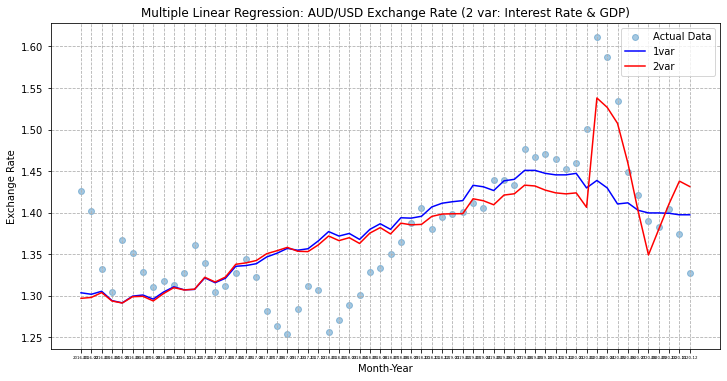

In [15]:
plt.figure(figsize=(12,6))
plt.scatter(month_year, y_fx, alpha=0.4)
plt.plot(month_year, y_fx_predict, color='b')
plt.plot(month_year, y_fx_predict_2, color='r')
plt.legend(["Actual Data", '1var', '2var'])
plt.title("Multiple Linear Regression: AUD/USD Exchange Rate (2 var: Interest Rate & GDP)")
plt.xlabel("Month-Year")
plt.ylabel("Exchange Rate")
plt.xticks(fontsize=4)
plt.grid(ls="--")
plt.show()

In [16]:
#2.3. Variables: Interest Rates & GDP & UER 
unemployment_rate = pd.read_csv("aus usa unemployment rate.csv")
unemployment_rate.head()

Date  aus_unemployment rate  usa_unemployment rate
0  1/1/2016               6.043354                    4.8
1  2/1/2016               5.717444                    4.9
2  3/1/2016               5.672294                    5.0
3  4/1/2016               5.660189                    5.1
4  5/1/2016               5.719530                    4.8

In [17]:
unemployment_rate['Date'] = pd.to_datetime(unemployment_rate['Date'])
unemployment_rate.head()

Date  aus_unemployment rate  usa_unemployment rate
0 2016-01-01               6.043354                    4.8
1 2016-02-01               5.717444                    4.9
2 2016-03-01               5.672294                    5.0
3 2016-04-01               5.660189                    5.1
4 2016-05-01               5.719530                    4.8

In [18]:
# Extractinng the dataframe to excel file
file_name = 'AUS_UER.xlsx'
  
# saving the excel
df.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


In [19]:
unemployment_rate['uer_diff'] = unemployment_rate['aus_unemployment rate'] - unemployment_rate['usa_unemployment rate']
uer_diff_all = unemployment_rate['uer_diff']
uer_diff = ["%.4f" % num for num in uer_diff_all]

print(uer_diff)

['1.2434', '0.8174', '0.6723', '0.5602', '0.9195', '0.7664', '0.8728', '0.6875', '0.6245', '0.6721', '1.0626', '1.1335', '1.0092', '1.2859', '1.4873', '1.2368', '1.1398', '1.2610', '1.2657', '1.0890', '1.1210', '1.1504', '1.2213', '1.5065', '1.5355', '1.5095', '1.5550', '1.5592', '1.5860', '1.2775', '1.4593', '1.4399', '1.2869', '1.1798', '1.3085', '1.1049', '1.0814', '1.2078', '1.3358', '1.6430', '1.5994', '1.6015', '1.5285', '1.5238', '1.6609', '1.6710', '1.5572', '1.4463', '1.8117', '1.6337', '0.8718', '-8.3257', '-6.1814', '-3.6465', '-2.7522', '-1.6419', '-1.0454', '0.0360', '0.1329', '-0.1221']


In [20]:
x_ir_gdp_uer = np.array(list(zip(x_ir, gdp_diff, uer_diff)))
x_ir_gdp_uer = x_ir_gdp_uer.astype(np.float)

model.fit(x_ir_gdp_uer, y_fx)
y_fx_predict_3 = model.predict(x_ir_gdp_uer)
print(y_fx_predict_3)
print()

print("R-squared after adding Unemployment rate:", model.score(x_ir_gdp_uer, y_fx))

[1.29735233 1.301077   1.3071695  1.29800656 1.29245104 1.30127608
 1.3011086  1.29756789 1.30655141 1.31272069 1.30633649 1.30644938
 1.32120397 1.31326301 1.31705818 1.33366433 1.3358709  1.33735712
 1.34515759 1.35046568 1.35469046 1.35077456 1.35053886 1.35631244
 1.36654487 1.36148416 1.36434204 1.35754612 1.36920985 1.3782678
 1.3696756  1.38265762 1.38259629 1.38463031 1.39333186 1.39841033
 1.39943703 1.39891271 1.41520113 1.41047152 1.40630329 1.41753631
 1.4197436  1.42991283 1.42811438 1.4237157  1.42206867 1.4222723
 1.42047051 1.40523403 1.49551811 1.56508776 1.52798648 1.47737603
 1.43088953 1.38797506 1.4017194  1.41102136 1.42619911 1.42441706]

R-squared after adding Unemployment rate: 0.5702500716526581


In [21]:
plt.figure(figsize=(12,6))
plt.scatter(month_year, y_fx, alpha=0.4)
plt.plot(month_year, y_fx_predict, color='b')
plt.plot(month_year, y_fx_predict_2, color='r')
plt.plot(month_year, y_fx_predict_3, color='g')
plt.legend(["Actual Data",'1var', '2var', '3var'])
plt.title("Multiple Linear Regression: AUD/USD Exchange Rate (3 var: Interest Rate, GDP & UER)")
plt.xlabel("Month-Year")
plt.ylabel("Exchange Rate")
plt.xticks(fontsize=4)
plt.grid(ls='--')
plt.show()

### Polynomial Regression

[1.42661317 1.4021189  1.33606092 1.30510591 1.36833455 1.35006882
 1.32621736 1.30980235 1.31727401 1.31173098 1.33713751 1.3501666
 1.34062876 1.30943903 1.31189035 1.32147489 1.34654359 1.32526066
 1.28036142 1.26370469 1.25189087 1.28877415 1.30936469 1.31396799
 1.28153888 1.26803659 1.28022868 1.29422497 1.32726914 1.34134143
 1.34418281 1.36101501 1.37153434 1.4123046  1.39131346 1.38680291
 1.40417736 1.39740612 1.41465799 1.4027994  1.44092168 1.44604764
 1.42598392 1.47623161 1.46779553 1.47131521 1.46537374 1.45210767
 1.45904127 1.50092118 1.61074527 1.58746479 1.53477747 1.44955042
 1.42075803 1.38975871 1.38316876 1.40406795 1.37394142 1.32796666]

R-squared for Polynomial model with the same varibles: 0.9946839862410186


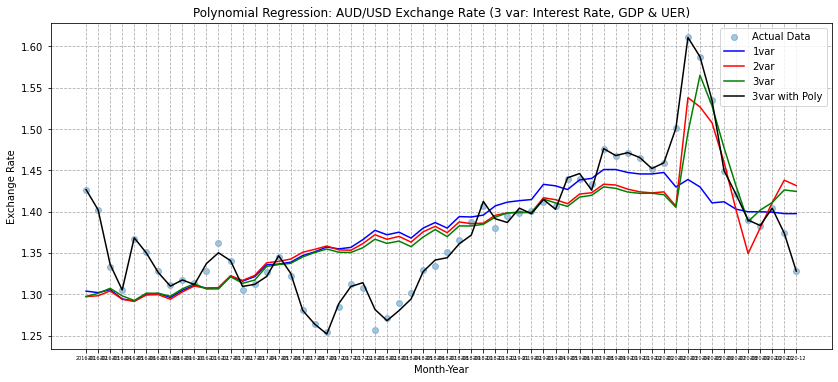

In [22]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# poly = PolynomialFeatures(degree=3)
poly = PolynomialFeatures(degree=5)

x_poly = poly.fit_transform(x_ir_gdp_uer)

model_poly = LinearRegression()
model_poly.fit(x_poly, y_fx)
y_pred = model_poly.predict(x_poly)
print(y_pred)

print()

print("R-squared for Polynomial model with the same varibles:", model_poly.score(x_poly, y_fx))

plt.figure(figsize=(14,6))
plt.scatter(month_year, y_fx, alpha=0.4)
plt.plot(month_year, y_fx_predict, color='b')
plt.plot(month_year, y_fx_predict_2, color='r')
plt.plot(month_year, y_fx_predict_3, color='g')
plt.plot(month_year, y_pred, color='black')
plt.legend(["Actual Data", '1var', '2var', '3var', '3var with Poly'])
plt.title("Polynomial Regression: AUD/USD Exchange Rate (3 var: Interest Rate, GDP & UER)")
plt.xlabel("Month-Year")
plt.ylabel("Exchange Rate")
plt.xticks(fontsize=5)
plt.grid(ls="--")
plt.show()

In [23]:
# Converting the predicted values into array
y_pred_df = np.array(y_pred).reshape(-1,1)
y_pred_df

array([[1.42661317],
       [1.4021189 ],
       [1.33606092],
       [1.30510591],
       [1.36833455],
       [1.35006882],
       [1.32621736],
       [1.30980235],
       [1.31727401],
       [1.31173098],
       [1.33713751],
       [1.3501666 ],
       [1.34062876],
       [1.30943903],
       [1.31189035],
       [1.32147489],
       [1.34654359],
       [1.32526066],
       [1.28036142],
       [1.26370469],
       [1.25189087],
       [1.28877415],
       [1.30936469],
       [1.31396799],
       [1.28153888],
       [1.26803659],
       [1.28022868],
       [1.29422497],
       [1.32726914],
       [1.34134143],
       [1.34418281],
       [1.36101501],
       [1.37153434],
       [1.4123046 ],
       [1.39131346],
       [1.38680291],
       [1.40417736],
       [1.39740612],
       [1.41465799],
       [1.4027994 ],
       [1.44092168],
       [1.44604764],
       [1.42598392],
       [1.47623161],
       [1.46779553],
       [1.47131521],
       [1.46537374],
       [1.452

In [24]:
# Creating a time-series data with the predicted values
index_values = ['2016-01','2016-02','2016-03','2016-04','2016-05','2016-06','2016-06','2016-08','2016-09','2016-10','2016-11','2016-12',
               '2017-01','2017-02','2017-03','2017-04','2017-05','2017-06','2017-07','2017-08','2017-09','2017-10','2017-11','2017-12',
               '2018-01','2018-02','2018-03','2018-04','2018-05','2018-06','2018-07','2018-08','2018-09','2018-10','2018-11','2018-12',
               '2019-01','2019-02','2019-03','2019-04','2019-05','2019-06','2019-07','2019-08','2019-09','2019-10','2019-11','2019-12',
               '2020-01','2020-02','2020-03','2020-04','2020-05','2020-06','2020-07','2020-08','2020-09','2020-10','2020-11','2020-12']
# monthYear = np.array(index_values).reshape(-1,1).astype('str')
column_values = ['Rates']
y_df = pd.DataFrame(data=y_pred_df, index=index_values, columns=column_values)
y_df

Rates
2016-01  1.426613
2016-02  1.402119
2016-03  1.336061
2016-04  1.305106
2016-05  1.368335
2016-06  1.350069
2016-06  1.326217
2016-08  1.309802
2016-09  1.317274
2016-10  1.311731
2016-11  1.337138
2016-12  1.350167
2017-01  1.340629
2017-02  1.309439
2017-03  1.311890
2017-04  1.321475
2017-05  1.346544
2017-06  1.325261
2017-07  1.280361
2017-08  1.263705
2017-09  1.251891
2017-10  1.288774
2017-11  1.309365
2017-12  1.313968
2018-01  1.281539
2018-02  1.268037
2018-03  1.280229
2018-04  1.294225
2018-05  1.327269
2018-06  1.341341
2018-07  1.344183
2018-08  1.361015
2018-09  1.371534
2018-10  1.412305
2018-11  1.391313
2018-12  1.386803
2019-01  1.404177
2019-02  1.397406
2019-03  1.414658
2019-04  1.402799
2019-05  1.440922
2019-06  1.446048
2019-07  1.425984
2019-08  1.476232
2019-09  1.467796
2019-10  1.471315
2019-11  1.465374
2019-12  1.452108
2020-01  1.459041
2020-02  1.500921
2020-03  1.610745
2020-04  1.587465
2020-05  1.534777
2020-06  1.449550
2020-07  1.420758
2020-08  1.389759
2020-09  1.383169
2020-10  1.404068
2020-11  1.373941
2020-12  1.327967

In [25]:
# Changing the index column as a new Column
y_df['month_year']=y_df.index
y_df_2 = y_df.reset_index()
y_df_2 = y_df_2.drop(['index'], axis=1)
y_df_2

new_cols = ['month_year', 'Rates']
y_df_2 = y_df_2[new_cols]
y_df_2

month_year     Rates
0     2016-01  1.426613
1     2016-02  1.402119
2     2016-03  1.336061
3     2016-04  1.305106
4     2016-05  1.368335
5     2016-06  1.350069
6     2016-06  1.326217
7     2016-08  1.309802
8     2016-09  1.317274
9     2016-10  1.311731
10    2016-11  1.337138
11    2016-12  1.350167
12    2017-01  1.340629
13    2017-02  1.309439
14    2017-03  1.311890
15    2017-04  1.321475
16    2017-05  1.346544
17    2017-06  1.325261
18    2017-07  1.280361
19    2017-08  1.263705
20    2017-09  1.251891
21    2017-10  1.288774
22    2017-11  1.309365
23    2017-12  1.313968
24    2018-01  1.281539
25    2018-02  1.268037
26    2018-03  1.280229
27    2018-04  1.294225
28    2018-05  1.327269
29    2018-06  1.341341
30    2018-07  1.344183
31    2018-08  1.361015
32    2018-09  1.371534
33    2018-10  1.412305
34    2018-11  1.391313
35    2018-12  1.386803
36    2019-01  1.404177
37    2019-02  1.397406
38    2019-03  1.414658
39    2019-04  1.402799
40    2019-05  1.440922
41    2019-06  1.446048
42    2019-07  1.425984
43    2019-08  1.476232
44    2019-09  1.467796
45    2019-10  1.471315
46    2019-11  1.465374
47    2019-12  1.452108
48    2020-01  1.459041
49    2020-02  1.500921
50    2020-03  1.610745
51    2020-04  1.587465
52    2020-05  1.534777
53    2020-06  1.449550
54    2020-07  1.420758
55    2020-08  1.389759
56    2020-09  1.383169
57    2020-10  1.404068
58    2020-11  1.373941
59    2020-12  1.327967

In [26]:
# Extractinng the dataframe to excel file
file_name = 'AustraliaPred_20162020.xlsx'
  
# saving the excel
y_df_2.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


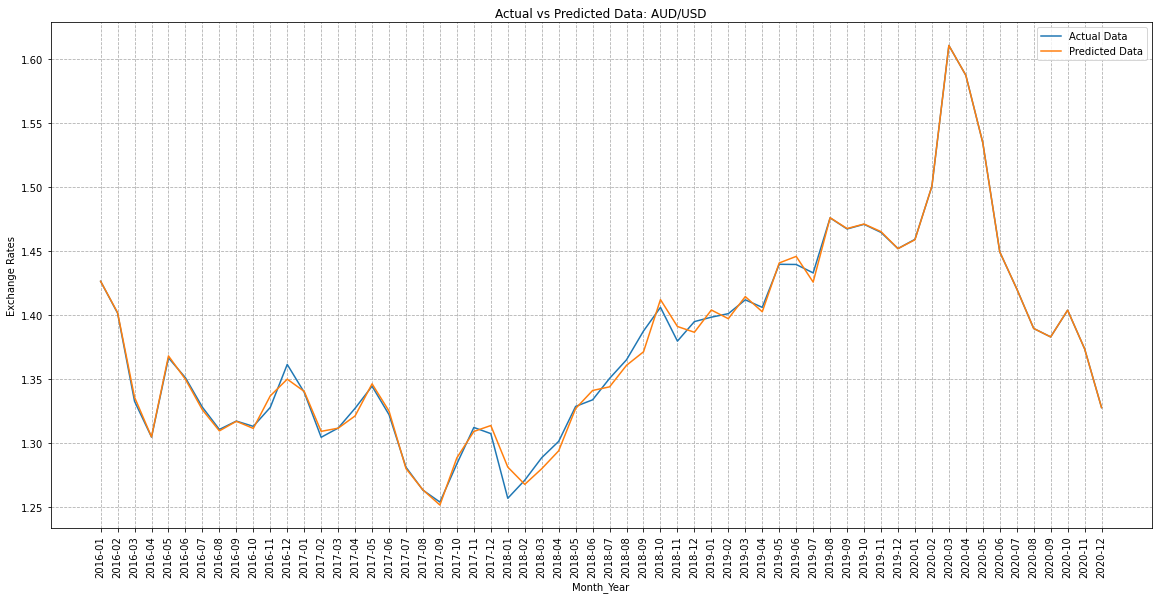

In [27]:
# to visualize the pattern of AUD/USD
x = aud_usd_fx['month_year'].astype(str)
y = aud_usd_fx['AUD_USD']

plt.figure(figsize=(16,8))
plt.plot(x, y, label='Actual Data')
plt.plot(x, y_df['Rates'], label='Predicted Data')
plt.tick_params(axis='x',rotation=90)
plt.tight_layout()
plt.title("Actual vs Predicted Data: AUD/USD")
plt.xlabel("Month_Year")
plt.ylabel("Exchange Rates")
plt.legend()
plt.grid(ls='--')
plt.show()

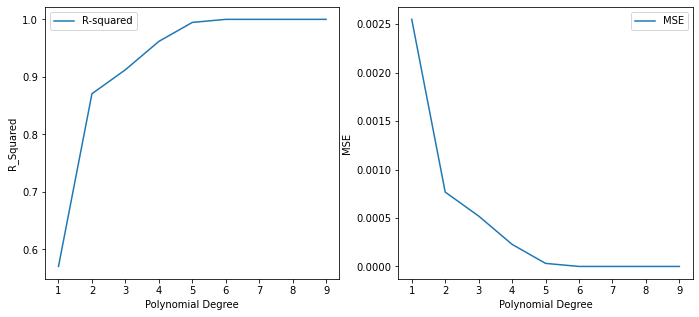

In [28]:
r_squared_list = []
mse_list = []
a = range(1,10,1)

for i in a:
    poly = PolynomialFeatures(degree=i)
    x_poly = poly.fit_transform(x_ir_gdp_uer)
    
    model_poly = LinearRegression()
    model_poly.fit(x_poly, y_fx)
    y_pred = model_poly.predict(x_poly)
    
    r_squared = model_poly.score(x_poly, y_fx)
    mse = mean_squared_error(y_pred, y_fx)
    
    r_squared_list.append(r_squared)
    mse_list.append(mse)

plt.figure(figsize=(10,5))
ax1 = plt.subplot(1,2,1)
plt.plot(a, r_squared_list, label="R-squared")
plt.xlabel("Polynomial Degree")
plt.ylabel("R_Squared")
plt.legend()
ax2 = plt.subplot(1,2,2)
plt.plot(a, mse_list, label="MSE")
plt.xlabel("Polynomial Degree")
plt.ylabel("MSE")
plt.legend()


plt.subplots_adjust(0.0005)

plt.show()

### Ridge Regression and Lasso Regression

In [29]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha=0.001)
ridge.fit(x_ir_gdp_uer, y_fx)

y_fx_ridge = ridge.predict(x_ir_gdp_uer)
print("Ridge Regression score:", ridge.score(x_ir_gdp_uer, y_fx))

lasso = Lasso(alpha=0.001)
lasso.fit(x_ir_gdp_uer, y_fx)

y_fx_lasso = lasso.predict(x_ir_gdp_uer)
print("Lasso Regression Score:", lasso.score(x_ir_gdp_uer, y_fx))

Ridge Regression score: 0.570250071505734
Lasso Regression Score: 0.5697453886149573


In [30]:
# Visualizing Ridge and Lasso Regression
plt.figure(figsize=(14,5))
plt.scatter(month_year, y_fx, alpha=0.4)
plt.plot(month_year, y_pred, color='black')
plt.plot(month_year, y_fx_ridge, color='r')
plt.plot(month_year, y_fx_lasso, color='b')
plt.legend(['Actual Data','3var with Poly', 'Ridge Regression', 'Lasso Regression'])
plt.title("Ridge and Lasso Regression: AUD/USD Exchange Rate (3 var: Interest Rate, GDP & UER)")
plt.xlabel("Month-Year")
plt.ylabel("Exchange Rate")
plt.xticks(fontsize=5)
plt.grid(ls="--")
plt.show()

#### Accuracy 2016

In [31]:
def forecast_accuracy(forecast, actual):
    
    mape = np.mean(np.abs(forecast-actual)/np.abs(actual)) #MAPE
    me = np.mean(forecast-actual) #ME
    mae = np.mean(np.abs(forecast-actual)) #MAE
    mpe = np.mean((forecast-actual)/actual) #MPE
    rmse = np.mean((forecast-actual)**2)**.5 #RMSE
    corr = np.corrcoef(forecast, actual)[0,1] #corr
    mins = np.amin(np.hstack([forecast[:,None], actual[:,None]]),axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)   # minmax
    accuracy = (1-mape)*100
    return ({'mape':mape, 'me':me, 'mae':mae, 'mpe':mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax, 'Overall accuracy':accuracy})

In [32]:
#Filtering actual data
aud_usd_fx2016 = df_groupby_aud[(df_groupby_aud['month_year'] >= '2016-01') & (df_groupby_aud['month_year'] <= '2016-12')].reset_index(drop=True)
aud_usd = aud_usd_fx2016['AUD_USD']

# filtering predicted data
predicted_data2016 = y_df_2[(y_df_2['month_year'] >= '2016-01') & (y_df_2['month_year'] <= '2016-12')].reset_index(drop=True)
predicted_rates = predicted_data2016['Rates']

actual2016 = np.array(aud_usd_fx2016['AUD_USD'])
print("---Actual 2016 Exchange Rates---")
print(actual2016)

print()

predicted2016 = np.array(predicted_rates)
print("---Predicted 2016 Exchange Rates---")
print(predicted2016)

# Calculating accuracy
accuracy = forecast_accuracy(predicted2016, actual2016)
accuracy_data2016 = pd.DataFrame.from_dict(accuracy, orient='index', columns={'2016'})
accuracy_data2016

---Actual 2016 Exchange Rates---
[1.4266     1.40173    1.33288696 1.30496667 1.36681429 1.35129545
 1.328275   1.3109087  1.31745714 1.313325   1.328125   1.36167619]

---Predicted 2016 Exchange Rates---
[1.42661317 1.4021189  1.33606092 1.30510591 1.36833455 1.35006882
 1.32621736 1.30980235 1.31727401 1.31173098 1.33713751 1.3501666 ]


2016
mape               0.001982
me                -0.000286
mae                0.002660
mpe               -0.000203
rmse               0.004433
corr               0.992593
minmax             0.001977
Overall accuracy  99.801843

#### Accuracy 2017

In [33]:
#Filtering actual data
aud_usd_fx2017 = df_groupby_aud[(df_groupby_aud['month_year'] >= '2017-01') & (df_groupby_aud['month_year'] <= '2017-12')].reset_index(drop=True)
aud_usd = aud_usd_fx2017['AUD_USD']

# filtering predicted data
predicted_data2017 = y_df_2[(y_df_2['month_year'] >= '2017-01') & (y_df_2['month_year'] <= '2017-12')].reset_index(drop=True)
predicted_rates = predicted_data2017['Rates']

actual2017 = np.array(aud_usd_fx2017['AUD_USD'])
print("---Actual 2017 Exchange Rates---")
print(actual2017)

print()

predicted2017 = np.array(predicted_rates)
print("---Predicted 2017 Exchange Rates---")
print(predicted2017)

# Calculating accuracy
accuracy = forecast_accuracy(predicted2017, actual2017)
accuracy_data2017 = pd.DataFrame.from_dict(accuracy, orient='index', columns={'2017'})
accuracy_data2017

---Actual 2017 Exchange Rates---
[1.33994211 1.3048     1.31198696 1.327435   1.34470909 1.32246364
 1.281435   1.26349565 1.25421    1.28410952 1.312465   1.30767   ]

---Predicted 2017 Exchange Rates---
[1.34062876 1.30943903 1.31189035 1.32147489 1.34654359 1.32526066
 1.28036142 1.26370469 1.25189087 1.28877415 1.30936469 1.31396799]


2017
mape               0.002148
me                 0.000715
mae                0.002807
mpe                0.000546
rmse               0.003492
corr               0.992396
minmax             0.002143
Overall accuracy  99.785217

#### Accuracy 2018

In [34]:
#Filtering actual data
aud_usd_fx2018 = df_groupby_aud[(df_groupby_aud['month_year'] >= '2018-01') & (df_groupby_aud['month_year'] <= '2018-12')].reset_index(drop=True)
aud_usd = aud_usd_fx2018['AUD_USD']

# filtering predicted data
predicted_data2018 = y_df_2[(y_df_2['month_year'] >= '2018-01') & (y_df_2['month_year'] <= '2018-12')].reset_index(drop=True)
predicted_rates = predicted_data2018['Rates']

actual2018 = np.array(aud_usd_fx2018['AUD_USD'])
print("---Actual 2018 Exchange Rates---")
print(actual2018)

print()

predicted2018 = np.array(predicted_rates)
print("---Predicted 2018 Exchange Rates---")
print(predicted2018)

# Calculating accuracy
accuracy = forecast_accuracy(predicted2018, actual2018)
accuracy_data2018 = pd.DataFrame.from_dict(accuracy, orient='index', columns={'2018'})
accuracy_data2018

---Actual 2018 Exchange Rates---
[1.2571619  1.27128421 1.28884091 1.30160476 1.32891364 1.33404762
 1.35079048 1.36531739 1.38778421 1.40625909 1.37988    1.39512778]

---Predicted 2018 Exchange Rates---
[1.28153888 1.26803659 1.28022868 1.29422497 1.32726914 1.34134143
 1.34418281 1.36101501 1.37153434 1.4123046  1.39131346 1.38680291]


2018
mape               0.006609
me                -0.000602
mae                0.008793
mpe               -0.000368
rmse               0.010615
corr               0.975601
minmax             0.006568
Overall accuracy  99.339117

#### Accuracy 2019

In [35]:
#Filtering actual data
aud_usd_fx2019 = df_groupby_aud[(df_groupby_aud['month_year'] >= '2019-01') & (df_groupby_aud['month_year'] <= '2019-12')].reset_index(drop=True)
aud_usd = aud_usd_fx2019['AUD_USD']

# filtering predicted data
predicted_data2019 = y_df_2[(y_df_2['month_year'] >= '2019-01') & (y_df_2['month_year'] <= '2019-12')].reset_index(drop=True)
predicted_rates = predicted_data2019['Rates']

actual2019 = np.array(aud_usd_fx2019['AUD_USD'])
print("---Actual 2019 Exchange Rates---")
print(actual2019)

print()

predicted2019 = np.array(predicted_rates)
print("---Predicted 2019 Exchange Rates---")
print(predicted2019)

# Calculating accuracy
accuracy = forecast_accuracy(predicted2019, actual2019)
accuracy_data2019 = pd.DataFrame.from_dict(accuracy, orient='index', columns={'2019'})
accuracy_data2019

---Actual 2019 Exchange Rates---
[1.39859    1.40132778 1.41212857 1.40626364 1.43988182 1.439735
 1.43316818 1.47612727 1.46746    1.47111364 1.46476316 1.45213333]

---Predicted 2019 Exchange Rates---
[1.40417736 1.39740612 1.41465799 1.4027994  1.44092168 1.44604764
 1.42598392 1.47623161 1.46779553 1.47131521 1.46537374 1.45210767]


2019
mape               0.001837
me                 0.000177
mae                0.002610
mpe                0.000121
rmse               0.003629
corr               0.991403
minmax             0.001833
Overall accuracy  99.816345

#### Accuracy 2020

In [36]:
#Filtering actual data
aud_usd_fx2020 = df_groupby_aud[(df_groupby_aud['month_year'] >= '2020-01') & (df_groupby_aud['month_year'] <= '2020-12')].reset_index(drop=True)
aud_usd = aud_usd_fx2020['AUD_USD']

# filtering predicted data
predicted_data2020 = y_df_2[(y_df_2['month_year'] >= '2020-01') & (y_df_2['month_year'] <= '2020-12')].reset_index(drop=True)
predicted_rates = predicted_data2020['Rates']

actual2020 = np.array(aud_usd_fx2020['AUD_USD'])
print("---Actual 2020 Exchange Rates---")
print(actual2020)

print()

predicted2020 = np.array(predicted_rates)
print("---Predicted 2020 Exchange Rates---")
print(predicted2020)

# Calculating accuracy
accuracy = forecast_accuracy(predicted2020, actual2020)
accuracy_data2020 = pd.DataFrame.from_dict(accuracy, orient='index', columns={'2020'})
accuracy_data2020

---Actual 2020 Exchange Rates---
[1.45935909 1.50069474 1.61074545 1.587465   1.53477778 1.44955
 1.42075909 1.38975789 1.383165   1.40401429 1.373925   1.32800476]

---Predicted 2020 Exchange Rates---
[1.45904127 1.50092118 1.61074527 1.58746479 1.53477747 1.44955042
 1.42075803 1.38975871 1.38316876 1.40406795 1.37394142 1.32796666]


2020
mape               0.000038
me                -0.000005
mae                0.000055
mpe               -0.000004
rmse               0.000114
corr               0.999999
minmax             0.000038
Overall accuracy  99.996231

In [37]:
accu2016 = accuracy_data2016['2016'].values[7]
accu2017 = accuracy_data2017['2017'].values[7]
accu2018 = accuracy_data2018['2018'].values[7]
accu2019 = accuracy_data2019['2019'].values[7]
accu2020 = accuracy_data2020['2020'].values[7]

y_axis = [accu2016, accu2017, accu2018, accu2019, accu2020]
x_axis = ['2016', '2017', '2018', '2019', '2020']

accu_df = pd.DataFrame({"Years":x_axis, "Overall Accuracy":y_axis})
accu_df

Years  Overall Accuracy
0  2016         99.801843
1  2017         99.785217
2  2018         99.339117
3  2019         99.816345
4  2020         99.996231